In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [36]:
# 定义真实情绪标签和预测标签
true_labels = [
    ['H'] * 20,  # happiness
    ['S'] * 20,  # sadness
    ['H'] * 20,  # happiness
    ['A'] * 20,  # angry
    ['F'] * 20,  # fear
    ['S'] * 20,  # sadness
    ['A'] * 20,  # angry
    ['S'] * 20,  # sadness
    ['S'] * 20,  # sadness
    ['F'] * 20,  # fear
    ['H'] * 20,  # happiness
    ['H'] * 20,  # happiness
    ['S'] * 20,  # sadness
    ['A'] * 20,  # angry
    ['F'] * 20,  # fear
    ['F'] * 20,  # fear
    ['A'] * 20,  # angry
    ['A'] * 20,  # angry
    ['F'] * 20,  # fear
    ['H'] * 20,  # happiness
    ['A'] * 20,  # angry
    ['F'] * 20,  # fear
    ['S'] * 20,  # sadness
    ['H'] * 20,  # happiness
    ['A'] * 20,  # angry
    ['F'] * 20,  # fear
    ['S'] * 20,  # sadness
    ['H'] * 20,  # happiness
]

predicted_labels = [
    list('HHFHFHHHFSHHFHHFHFHH'),
    list('SFFSSSSSFFFSSFSFSSFS'),
    list('HHHFAHAFHHAHHAHAHHFH'),
    list('AAAFHAFAHAHAAFAAHHAA'),
    list('FFAAFAHHFASFFAAFAFFA'),# fear
    list('SSSSSSSSSSSSSSSSSSSS'),
    list('AAAHHHFAFHAAFHAAAAFA'),
    list('SFSSSSSSSSFSSSFSSSSF'),
    list('SSSSSSSSSSHSSSSSSSSS'),
    list('FFFHFFFHHSFFFFHHFFHF'),# fear
    list('AHHHHHFFHAHHHHFAHHFH'),
    list('HHHHHHHHSAAHHHAHHHAH'),
    list('FFHFFSHHAFFHSHHSFFSH'),
    list('AAAAAAFAAAHFAAAFAAAA'),
    list('FFHFFAFHFFSFFAFHFFAH'),# fear
    list('HFFFFAHFAFFFFHFFFAFF'),# fear
    list('AAFFFAAAFFAAAFAAFAFA'),
    list('AAHAHAAAFHAAAAFAAAHA'),
    list('ASHHFHFAHFAAFFAFAFHF'),# fear
    list('HFHHSFHHSSHSSHHSSHHF'),
    list('FAAAAAFFAAFAAAHAFAAA'),
    list('AHAAAAAAHAAHAAAHHAAF'),
    list('FFHFFFSFFHHFFSFSFFHF'),# fear
    list('AHHFHHFHAHHHAHHHAFHH'),
    list('SSSSSSSSSSSSSSSSSSSS'),
    list('SSFFSSSSHSSSSFSSSHSS'),
    list('SHFHHHSFHHFHSHSHHSHH'),
    list('FFFHFFHSFFHFFSFFFHFF'),# fear
]

In [37]:
counts = [{'H': row.count('H'), 'S': row.count('S'), 'A': row.count('A'), 'F': row.count('F')} for row in predicted_labels]

for i, count in enumerate(counts, 1):
    print(f"Row {i}: H = {count['H']}, S = {count['S']}, A = {count['A']}, F = {count['F']}")

Row 1: H = 13, S = 1, A = 0, F = 6
Row 2: H = 0, S = 12, A = 0, F = 8
Row 3: H = 12, S = 0, A = 5, F = 3
Row 4: H = 5, S = 0, A = 12, F = 3
Row 5: H = 2, S = 1, A = 8, F = 9
Row 6: H = 0, S = 20, A = 0, F = 0
Row 7: H = 5, S = 0, A = 11, F = 4
Row 8: H = 0, S = 16, A = 0, F = 4
Row 9: H = 1, S = 19, A = 0, F = 0
Row 10: H = 6, S = 1, A = 0, F = 13
Row 11: H = 13, S = 0, A = 3, F = 4
Row 12: H = 15, S = 1, A = 4, F = 0
Row 13: H = 7, S = 4, A = 1, F = 8
Row 14: H = 1, S = 0, A = 16, F = 3
Row 15: H = 4, S = 1, A = 3, F = 12
Row 16: H = 3, S = 0, A = 3, F = 14
Row 17: H = 0, S = 0, A = 12, F = 8
Row 18: H = 4, S = 0, A = 14, F = 2
Row 19: H = 5, S = 1, A = 6, F = 8
Row 20: H = 10, S = 7, A = 0, F = 3
Row 21: H = 1, S = 0, A = 14, F = 5
Row 22: H = 5, S = 0, A = 14, F = 1
Row 23: H = 4, S = 3, A = 0, F = 13
Row 24: H = 13, S = 0, A = 4, F = 3
Row 25: H = 0, S = 20, A = 0, F = 0
Row 26: H = 2, S = 15, A = 0, F = 3
Row 27: H = 12, S = 5, A = 0, F = 3
Row 28: H = 4, S = 2, A = 0, F = 14


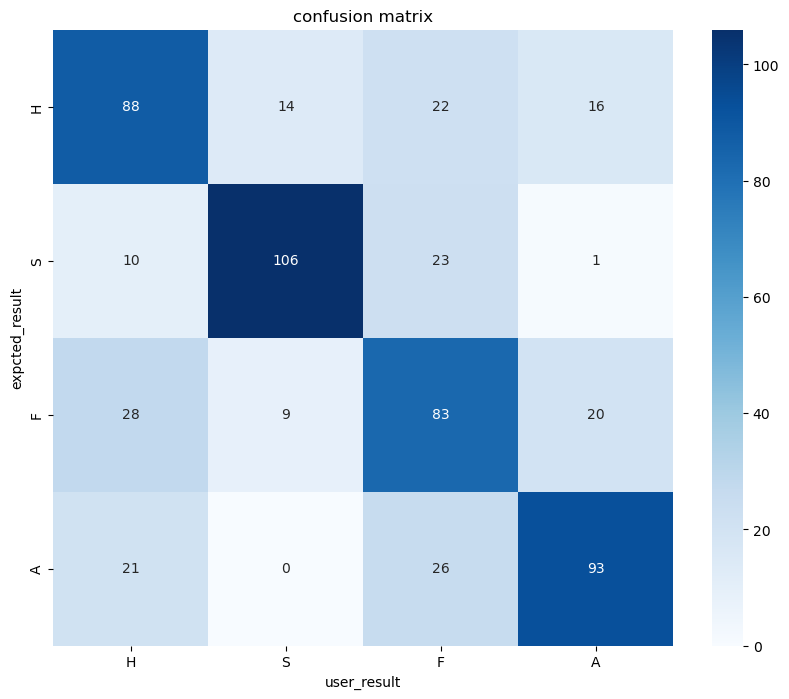

In [27]:
# 将标签列表扁平化处理，便于计算混淆矩阵
true_flat = [label for sublist in true_labels for label in sublist]
predicted_flat = [label for sublist in predicted_labels for label in sublist]

# 计算混淆矩阵
labels = ['H', 'S', 'F', 'A']
cm = confusion_matrix(true_flat, predicted_flat, labels=labels)

# 绘制混淆矩阵图
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('user_result')
plt.ylabel('expcted_result')
plt.title('confusion matrix')
plt.show()

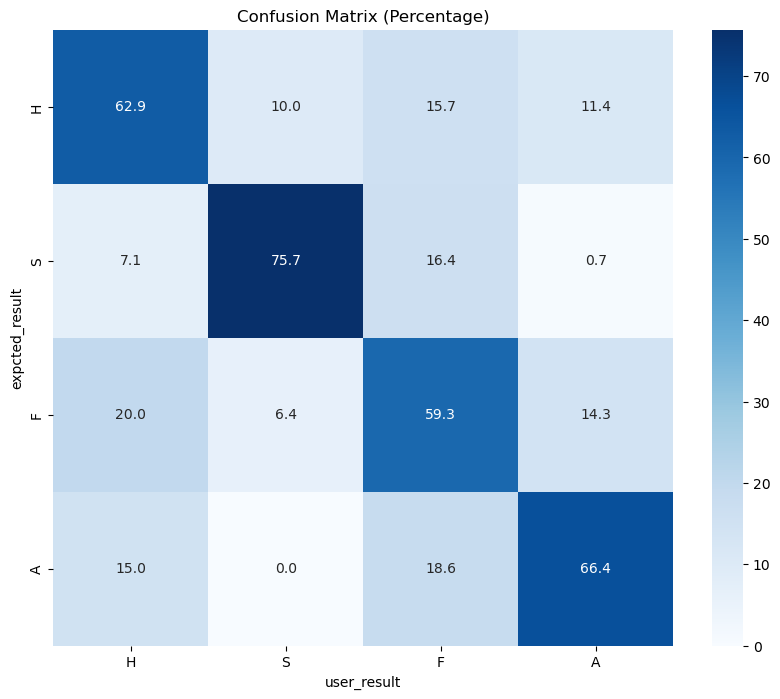

In [28]:
# 绘制百分比混淆矩阵
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# 绘制百分比混淆矩阵图
plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".1f", cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('user_result')
plt.ylabel('expcted_result')
plt.title('Confusion Matrix (Percentage)')
plt.show()

In [21]:
import pandas as pd

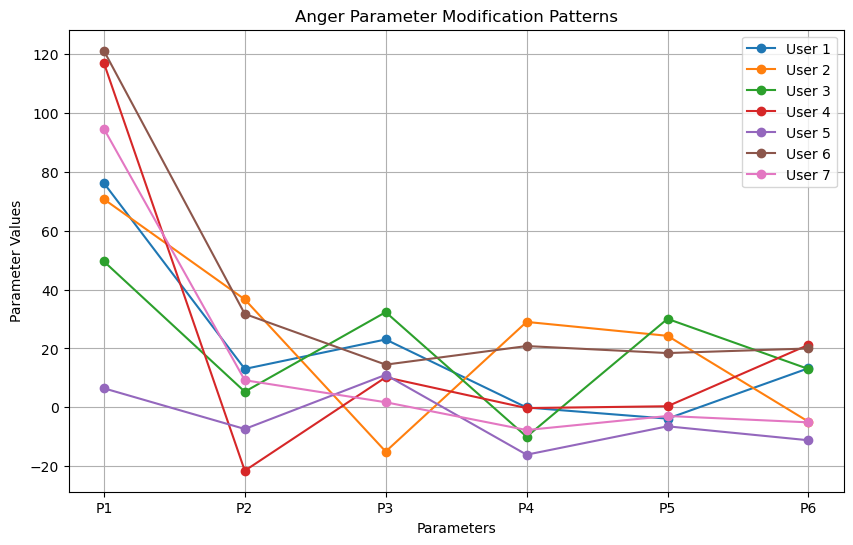

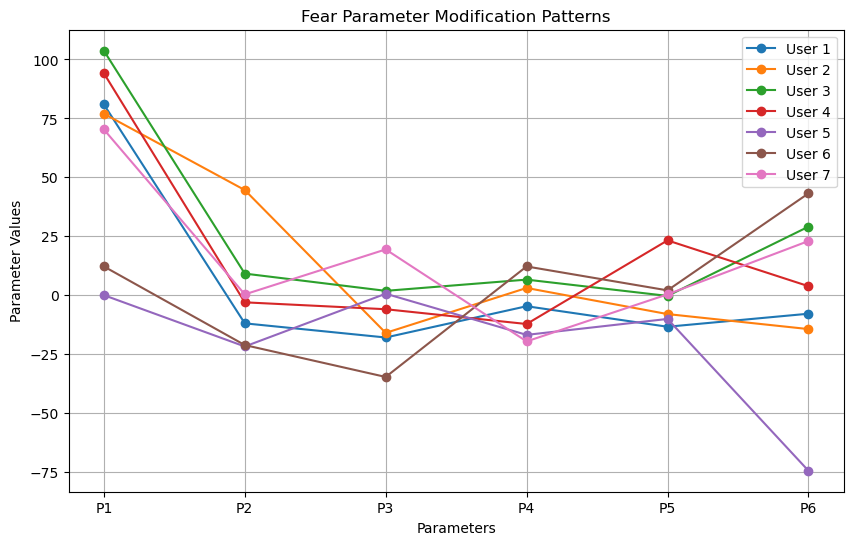

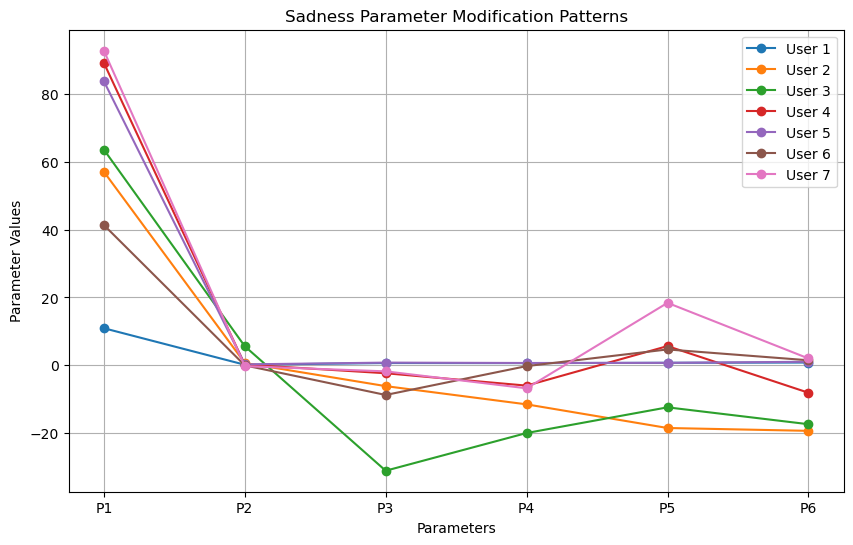

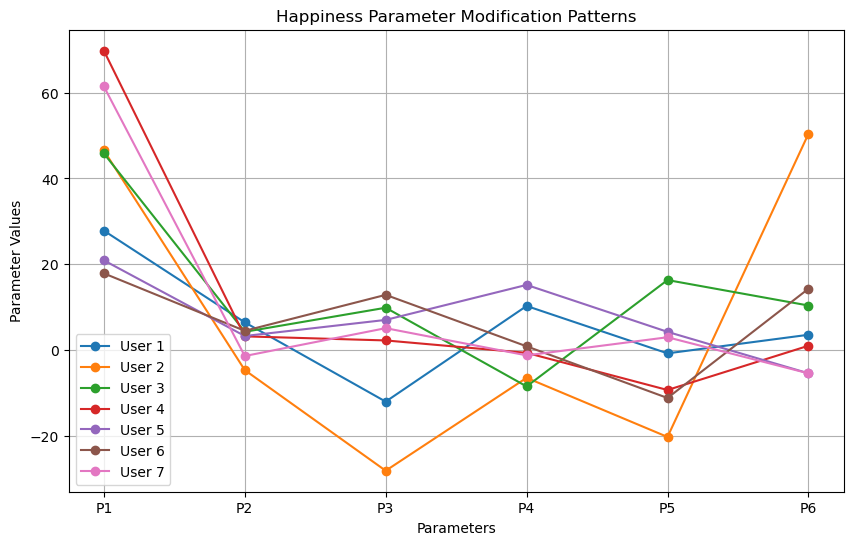

In [22]:
# Define a function to create line plots for each parameter set of emotions
def plot_emotion_lines(data, title):
    df = pd.DataFrame(data, columns=['P1', 'P2', 'P3', 'P4', 'P5', 'P6'])
    plt.figure(figsize=(10, 6))
    
    # Plot each row as a line
    for index, row in df.iterrows():
        plt.plot(['P1', 'P2', 'P3', 'P4', 'P5', 'P6'], row, marker='o', label=f'User {index+1}')
    
    plt.title(title)
    plt.ylabel('Parameter Values')
    plt.xlabel('Parameters')
    plt.grid(True)
    plt.legend()
    plt.show()

# Plot line graphs for each emotion data set
plot_emotion_lines(anger_data, 'Anger Parameter Modification Patterns')
plot_emotion_lines(fear_data, 'Fear Parameter Modification Patterns')
plot_emotion_lines(sadness_data, 'Sadness Parameter Modification Patterns')
plot_emotion_lines(happiness_data, 'Happiness Parameter Modification Patterns')

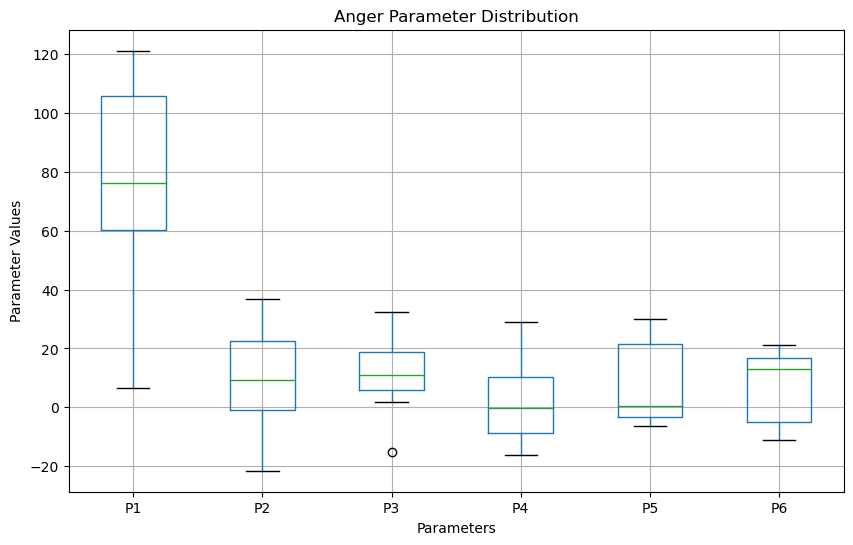

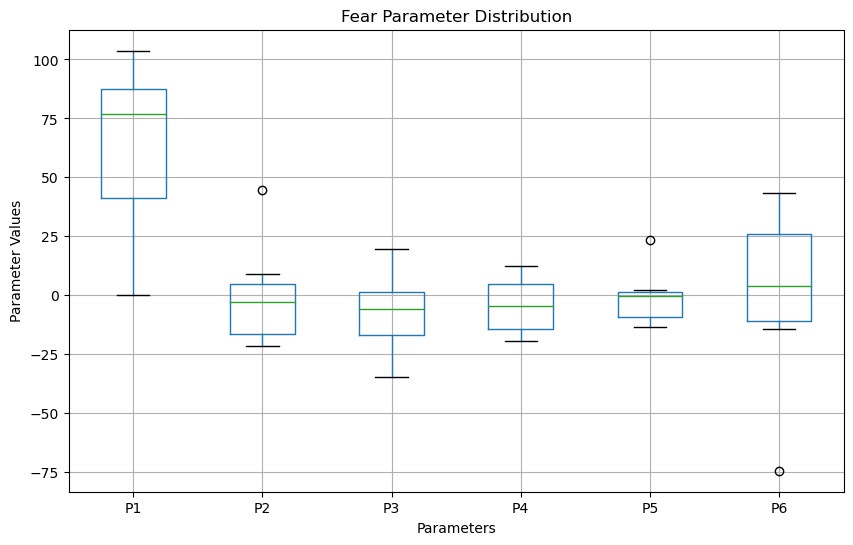

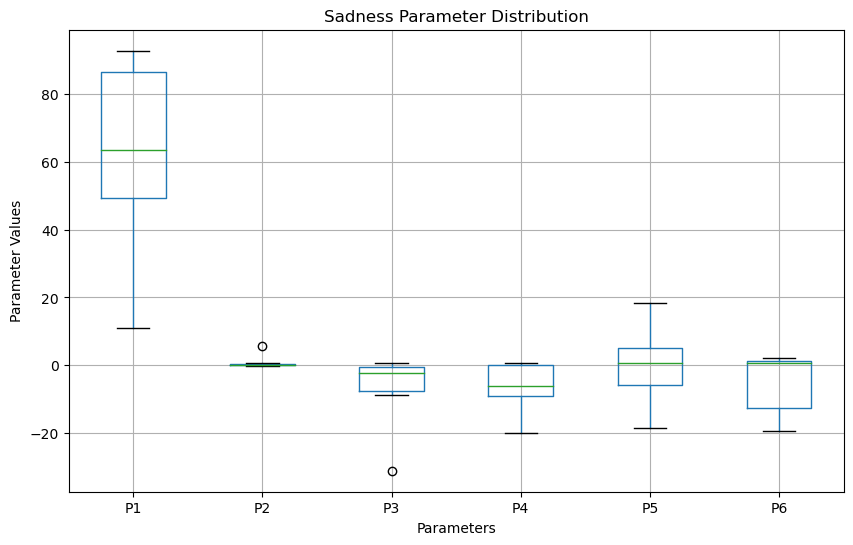

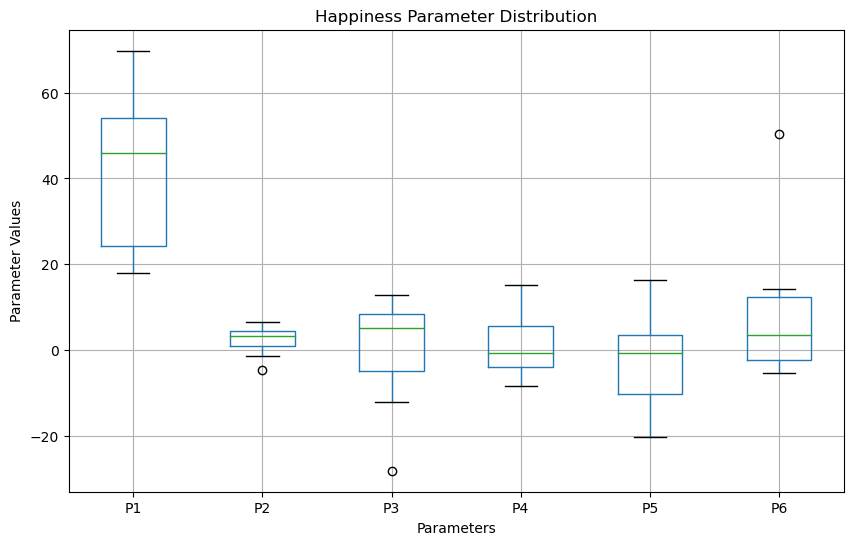

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for each emotion
anger_data = [
    [76.23, 13.03, 23.05, -0.08, -3.87, 13.26],
    [70.76, 36.66, -15.06, 29.02, 24.29, -4.90],
    [49.59, 5.29, 32.34, -10.01, 30.06, 13.01],
    [117.07, -21.58, 10.19, -0.28, 0.34, 21.21],
    [6.45, -7.39, 11.03, -16.13, -6.48, -11.22],
    [121.23, 31.73, 14.49, 20.81, 18.43, 19.98],
    [94.72, 9.19, 1.70, -7.75, -2.97, -5.13]
]

fear_data = [
    [80.92, -11.89, -17.89, -4.63, -13.33, -7.81],
    [76.98, 44.62, -15.93, 3.11, -7.96, -14.32],
    [103.69, 9.20, 1.89, 6.65, -0.26, 29.09],
    [94.13, -2.98, -5.90, -12.17, 23.28, 3.87],
    [0.06, -21.70, 0.67, -16.78, -10.02, -74.37],
    [12.23, -21.10, -34.62, 12.23, 2.09, 43.19],
    [70.30, 0.39, 19.45, -19.54, 0.39, 23.00]
]

sadness_data = [
    [10.90, 0.12, 0.63, 0.60, 0.70, 0.77],
    [57.09, 0.64, -6.19, -11.57, -18.55, -19.39],
    [63.61, 5.58, -31.16, -20.03, -12.45, -17.43],
    [89.21, 0.17, -2.39, -6.04, 5.63, -8.14],
    [83.81, 0.23, 0.75, 0.64, 0.68, 1.00],
    [41.36, -0.06, -8.80, -0.28, 4.64, 1.44],
    [92.81, -0.31, -1.83, -6.83, 18.39, 1.98]
]

happiness_data = [
    [27.82, 6.45, -12.02, 10.27, -0.77, 3.56],
    [46.50, -4.67, -28.12, -6.47, -20.25, 50.37],
    [45.81, 4.25, 9.86, -8.48, 16.31, 10.38],
    [69.75, 3.19, 2.24, -0.65, -9.31, 1.00],
    [20.90, 3.27, 7.02, 15.18, 4.24, -5.42],
    [17.87, 4.48, 12.86, 0.87, -11.17, 14.28],
    [61.42, -1.39, 5.10, -1.24, 2.98, -5.43]
]

# Define a function to create box plots
def plot_emotion_parameters(data, title):
    df = pd.DataFrame(data, columns=['P1', 'P2', 'P3', 'P4', 'P5', 'P6'])
    plt.figure(figsize=(10, 6))
    df.boxplot()
    plt.title(title)
    plt.ylabel('Parameter Values')
    plt.xlabel('Parameters')
    plt.grid(True)
    plt.show()

# Plot each emotion data set
plot_emotion_parameters(anger_data, 'Anger Parameter Distribution')
plot_emotion_parameters(fear_data, 'Fear Parameter Distribution')
plot_emotion_parameters(sadness_data, 'Sadness Parameter Distribution')
plot_emotion_parameters(happiness_data, 'Happiness Parameter Distribution')



In [39]:
Row 1: H = 13, S = 1, A = 0, F = 6 A
Row 2: H = 0, S = 12, A = 0, F = 8 B
Row 3: H = 12, S = 0, A = 5, F = 3 E
Row 4: H = 5, S = 0, A = 12, F = 3 C
Row 5: H = 2, S = 1, A = 8, F = 9 E
    
Row 6: H = 0, S = 20, A = 0, F = 0 E
Row 7: H = 5, S = 0, A = 11, F = 4 E
Row 8: H = 0, S = 16, A = 0, F = 4 D
Row 9: H = 1, S = 19, A = 0, F = 0 A
Row 10: H = 6, S = 1, A = 0, F = 13 D
    
Row 11: H = 13, S = 0, A = 3, F = 4 C
Row 12: H = 15, S = 1, A = 4, F = 0 D
Row 13: H = 7, S = 4, A = 1, F = 8 C
Row 14: H = 1, S = 0, A = 16, F = 3 D
Row 15: H = 4, S = 1, A = 3, F = 12 A
    
Row 16: H = 3, S = 0, A = 3, F = 14 B
Row 17: H = 0, S = 0, A = 12, F = 8 B
Row 18: H = 4, S = 0, A = 14, F = 2 A
Row 19: H = 5, S = 1, A = 6, F = 8 C
Row 20: H = 10, S = 7, A = 0, F = 3 B
    
Row 21: H = 1, S = 0, A = 14, F = 5 F
Row 22: H = 4, S = 3, A = 0, F = 13 G
Row 23: H = 0, S = 20, A = 0, F = 0 F
Row 24: H = 13, S = 0, A = 4, F = 3 G
Row 25: H = 5, S = 0, A = 14, F = 1 F
Row 26: H = 4, S = 2, A = 0, F = 14 G
Row 27: H = 2, S = 15, A = 0, F = 3 F
Row 28: H = 12, S = 5, A = 0, F = 3 G

# A
happy: Row 1: H = 13, S = 1, A = 0, F = 6
sad: Row 9: H = 1, S = 19, A = 0, F = 0 A
fear: Row 15: H = 4, S = 1, A = 3, F = 12 A
anger: Row 18: H = 4, S = 0, A = 14, F = 2 A
        
# B
sad: Row 2: H = 0, S = 12, A = 0, F = 8 B
fear: Row 16: H = 3, S = 0, A = 3, F = 14 B
anger: Row 17: H = 0, S = 0, A = 12, F = 8 B
happy: Row 20: H = 10, S = 7, A = 0, F = 3 B
        
# C
angry: Row 4: H = 5, S = 0, A = 12, F = 3 C
sad: Row 13: H = 7, S = 4, A = 1, F = 8 C
happy: Row 11: H = 13, S = 0, A = 3, F = 4 C
fear: Row 19: H = 5, S = 1, A = 6, F = 8 C
        
# D
sad: Row 8: H = 0, S = 16, A = 0, F = 4 D
fear: Row 10: H = 6, S = 1, A = 0, F = 13 D
happy: Row 12: H = 15, S = 1, A = 4, F = 0 D
anger: Row 14: H = 1, S = 0, A = 16, F = 3 D
        
# E
happy: Row 3: H = 12, S = 0, A = 5, F = 3 E
fear: Row 5: H = 2, S = 1, A = 8, F = 9 E
sad: Row 6: H = 0, S = 20, A = 0, F = 0 E
anger: Row 7: H = 5, S = 0, A = 11, F = 4 E
        
# F
anger: Row 21: H = 1, S = 0, A = 14, F = 5
fear: Row 23: H = 4, S = 3, A = 0, F = 13
sad: Row 25: H = 0, S = 20, A = 0, F = 0
happy: Row 27: H = 12, S = 5, A = 0, F = 3

# G
anger: Row 22: H = 5, S = 0, A = 14, F = 1
fear: Row 24: H = 4, S = 2, A = 0, F = 14
sad: Row 26: H = 2, S = 15, A = 0, F = 3
happy: Row 28: H = 13, S = 0, A = 4, F = 3

SyntaxError: invalid syntax (3629795126.py, line 1)

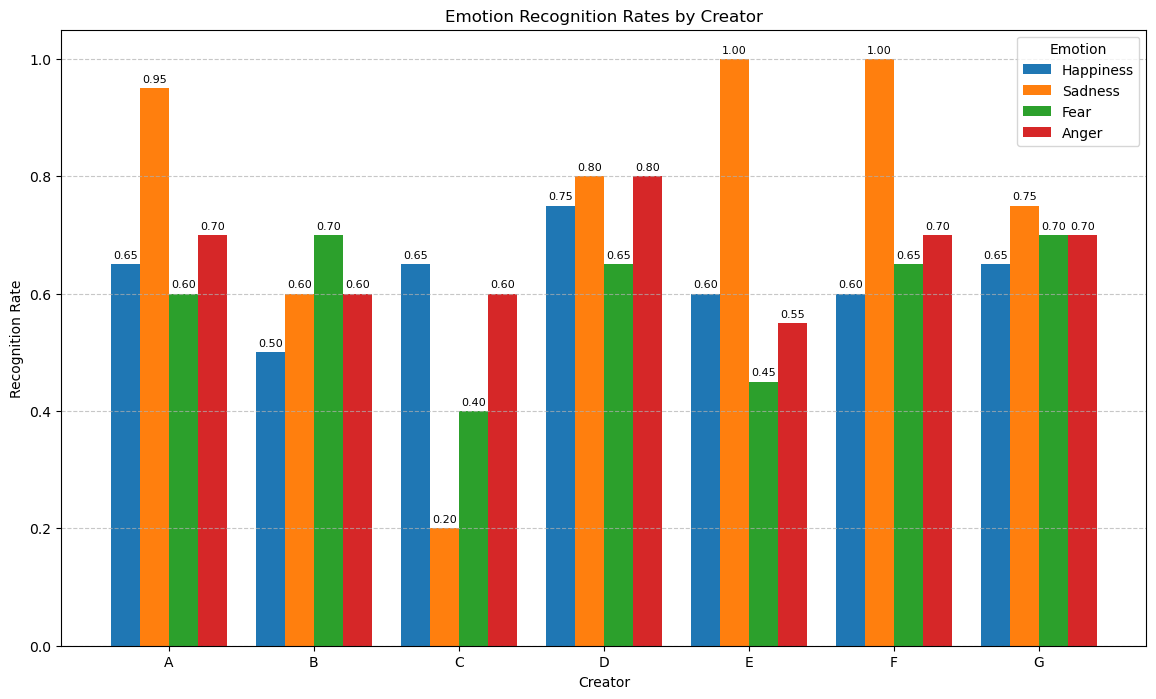

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Data preparation for each creator and emotion recognition rates
data = {
    'Creator': ['E', 'E', 'E', 'E', 'D', 'D', 'D', 'D', 'C', 'C', 'C', 'C', 
                'B', 'B', 'B', 'B', 'A', 'A', 'A', 'A', 'G', 'G', 'G', 'G', 
                'F', 'F', 'F', 'F'],
    'Emotion': ['Anger', 'Fear', 'Sadness', 'Happiness'] * 7,
    'Recognition Rate': [
        11 / 20, 9 / 20, 20 / 20, 12 / 20,  # E
        16 / 20, 13 / 20, 16 / 20, 15 / 20,  # D
        12 / 20, 8 / 20, 4 / 20, 13 / 20,  # C
        12 / 20, 14 / 20, 12 / 20, 10 / 20,  # B
        14 / 20, 12 / 20, 19 / 20, 13 / 20,  # A
        14 / 20, 14 / 20, 15 / 20, 13 / 20,  # G
        14 / 20, 13 / 20, 20 / 20, 12 / 20  # F
    ]
}

# Convert data into a DataFrame
df = pd.DataFrame(data)

# Adjusting the plot order according to the creator sequence A to G
df['Creator'] = pd.Categorical(df['Creator'], categories=['A', 'B', 'C', 'D', 'E', 'F', 'G'], ordered=True)
df = df.sort_values(by='Creator')

# Create the grouped bar plot with numeric labels
plt.figure(figsize=(14, 8))

creators = df['Creator'].unique()
emotions = df['Emotion'].unique()

# Plotting with recognition rate labels
for i, emotion in enumerate(emotions):
    subset = df[df['Emotion'] == emotion]
    positions = [x + i * 0.2 for x in range(len(creators))]
    plt.bar(positions, subset['Recognition Rate'], width=0.2, label=emotion)
    
    # Adding text labels
    for pos, rate in zip(positions, subset['Recognition Rate']):
        plt.text(pos, rate + 0.01, f'{rate:.2f}', ha='center', fontsize=8)

# Formatting plot
plt.xlabel('Creator')
plt.ylabel('Recognition Rate')
plt.title('Emotion Recognition Rates by Creator')
plt.xticks([r + 0.3 for r in range(len(creators))], creators)
plt.legend(title='Emotion')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
